Data Science - EA10: Clustering

Import libraries

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


Import Data (converted to csv) and print it

In [125]:
country_data = pd.read_csv('data/country.csv')

country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680


Show informations about the data

In [126]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   child_mort  151 non-null    float64
 2   exports     151 non-null    float64
 3   health      151 non-null    float64
 4   imports     151 non-null    float64
 5   income      151 non-null    int64  
 6   inflation   151 non-null    float64
 7   life_expec  151 non-null    float64
 8   total_fer   151 non-null    float64
 9   gdpp        151 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB


In [127]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


Data cleaning

In [128]:
country_data = country_data.drop_duplicates()
country_data.isna().sum()
country_data = country_data.dropna()

numerical_columns = country_data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(country_data[numerical_columns])

# For categorical features:
categorical_columns = country_data.select_dtypes(include=['object']).columns
data[categorical_columns] = country_data[categorical_columns].fillna('Unknown')

country_data.info()
country_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   child_mort  151 non-null    float64
 2   exports     151 non-null    float64
 3   health      151 non-null    float64
 4   imports     151 non-null    float64
 5   income      151 non-null    int64  
 6   inflation   151 non-null    float64
 7   life_expec  151 non-null    float64
 8   total_fer   151 non-null    float64
 9   gdpp        151 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


Scale the data

In [129]:
data=country_data.drop(['country'],axis=1)
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

scaled_df=pd.DataFrame(scaled,columns=data.columns)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.290688,0.222499,-0.487182,0.421831,-0.516285,2.865576,-0.509280,-0.195277,-0.587378
1,0.955192,-0.738239,-0.169736,-1.188277,-0.736187,1.073589,-0.498146,1.291005,-0.649931
2,1.294977,-0.627932,-0.072338,-0.466786,-0.854752,0.387880,-1.967811,1.576318,-0.704518
3,-0.822526,1.279311,1.410278,1.155551,1.175543,-0.546514,1.027187,-0.712821,1.644762
4,1.922842,0.023235,0.403831,0.132419,-0.876083,1.183302,-1.477923,2.392446,-0.711201


Elbow method to find optimal amount of clusters

c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

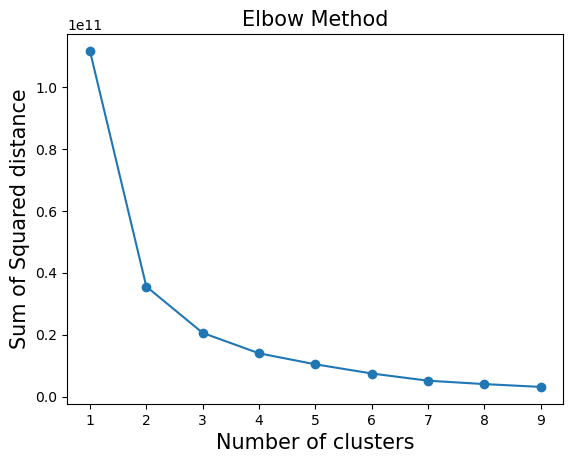

In [130]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

K-Means clustering with 3 clasters as elbow method suggests

In [131]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
country_data['cluster'] = kmeans.fit_predict(scaled_df)

country_data

c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,1
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480,2
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459,2
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,2
...,...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,1
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,1
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680,1


PCA

In [132]:
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

pca_df['cluster'] = country_data['cluster']

pca_df

,PC1,PC2,cluster
0,-0.963435,0.658502,1
1,-2.319607,-0.659672,2
2,-2.972960,0.259851,2
3,3.044766,0.627254,0
4,-3.177162,1.088177,2
...,...,...,...
146,2.382175,-1.026547,0
147,0.883982,-1.365177,1
148,0.093241,-1.724261,1
149,0.974621,-0.303671,1


PCA clustering plot

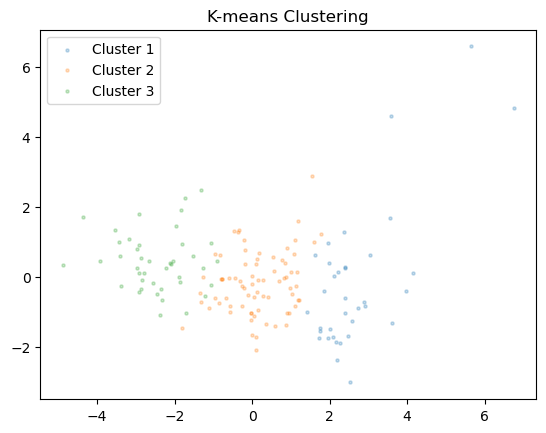

In [133]:
plt.figure()
for cluster in range(n_clusters):
    plt.scatter(pca_df[pca_df['cluster'] == cluster]['PC1'], 
                pca_df[pca_df['cluster'] == cluster]['PC2'], 
                s=5, label=f'Cluster {cluster+1}', alpha=0.25)
plt.title('K-means Clustering')
plt.legend()
plt.show()

Hierarchical clustering (with Dendogram and PCA)

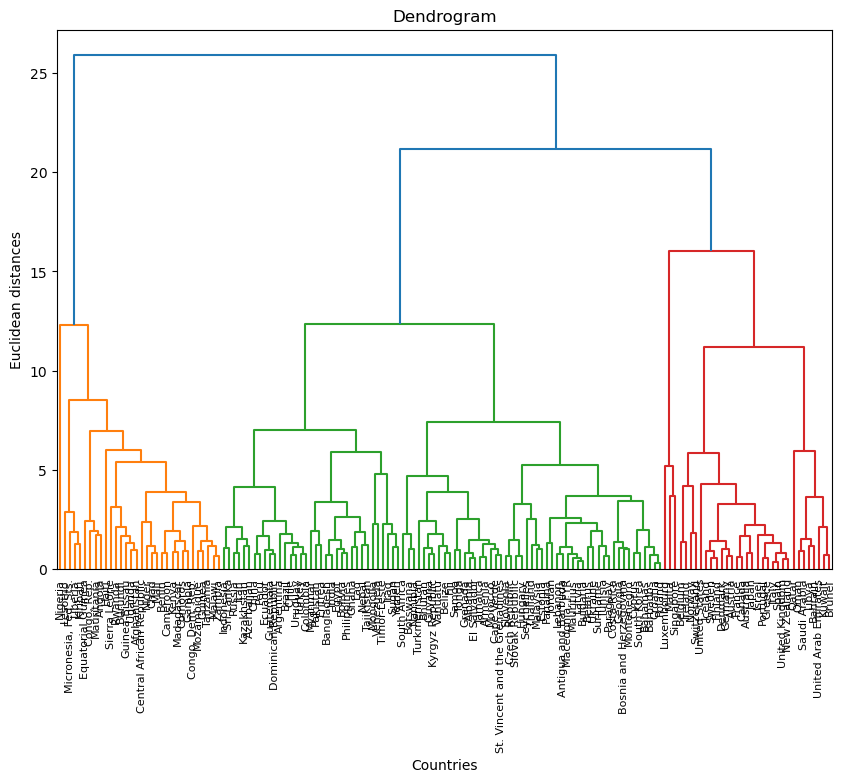

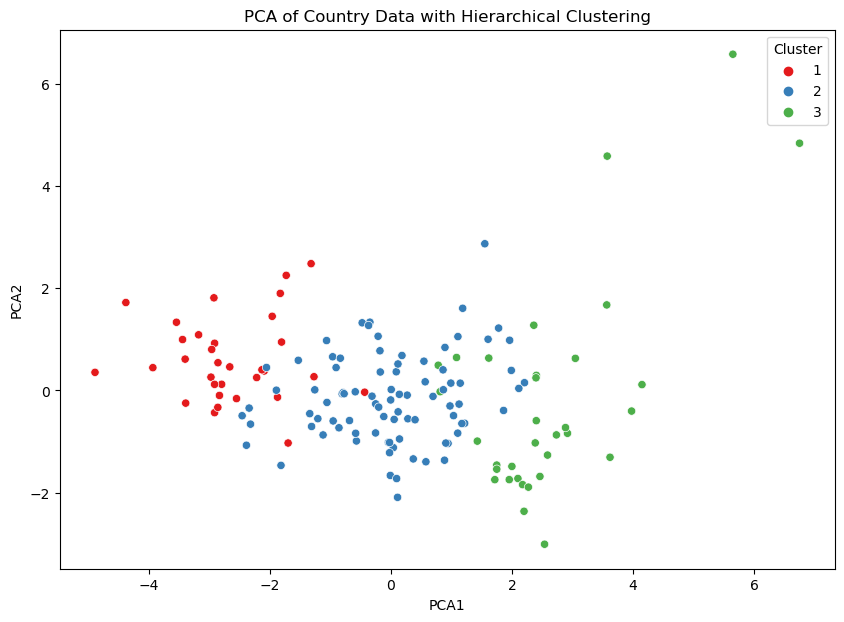

            country  child_mort  exports  health  imports  income  inflation  \
0          Mongolia        26.1     46.7    5.44     56.7    7710      39.20   
1             Sudan        76.7     19.7    6.32     17.2    3370      19.60   
2            Malawi        90.5     22.8    6.59     34.9    1030      12.10   
3           Belgium         4.5     76.4   10.70     74.7   41100       1.88   
4  Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609      20.80   

   life_expec  total_fer   gdpp  cluster      PCA1      PCA2  Cluster  
0        66.2       2.64   2650        1 -0.963435  0.658502        2  
1        66.3       4.88   1480        2 -2.319607 -0.659672        2  
2        53.1       5.31    459        2 -2.972960  0.259851        1  
3        80.0       1.86  44400        0  3.044766  0.627254        3  
4        57.5       6.54    334        2 -3.177162  1.088177        1  
High Priority Countries: ['Malawi', 'Congo, Dem. Rep.', 'Lesotho', 'Burundi', 'Mauritan

In [136]:
country_data['PCA1'] = pca_features[:, 0]
country_data['PCA2'] = pca_features[:, 1]
# Hierarchical Clustering
linked = linkage(scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=country_data['country'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

# Cut the dendrogram to form flat clusters
clusters = fcluster(linked, t=n_clusters, criterion='maxclust')
country_data['Cluster'] = clusters

# Plot PCA with hierarchical clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=country_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('PCA of Country Data with Hierarchical Clustering')
plt.show()

# Display the first few rows of the dataframe with PCA components and clusters
print(country_data.head())

Creating list of priority for the countries based on the hierarchical clustering

In [137]:
# Adding cluster labels to the dataframe
country_clusters = pd.DataFrame({'country': country_data['country'], 'cluster': clusters})
# Generate lists of countries in each cluster
high_priority_countries = country_clusters[country_clusters['cluster'] == 1]['country'].to_list()
medium_priority_countries = country_clusters[country_clusters['cluster'] == 2]['country'].to_list()
low_priority_countries = country_clusters[country_clusters['cluster'] == 3]['country'].to_list()

print("High Priority Countries:", high_priority_countries)
print("Medium Priority Countries:", medium_priority_countries)
print("Low Priority Countries:", low_priority_countries)

High Priority Countries: ['Malawi', 'Congo, Dem. Rep.', 'Lesotho', 'Burundi', 'Mauritania', 'Kenya', 'Sierra Leone', 'Comoros', 'Madagascar', 'Benin', 'Cameroon', 'Uganda', 'Afghanistan', 'Micronesia, Fed. Sts.', 'Haiti', 'Gambia', 'Rwanda', 'Congo, Rep.', 'Mozambique', 'Chad', 'Guinea', 'Niger', 'Angola', 'Liberia', 'Tanzania', 'Kiribati', 'Zambia', 'Guinea-Bissau', 'Mali', 'Central African Republic', 'Nigeria', 'Equatorial Guinea']
Medium Priority Countries: ['Mongolia', 'Sudan', 'Bolivia', 'Turkey', 'Georgia', 'Slovak Republic', 'Belize', 'Pakistan', 'Belarus', 'Panama', 'Indonesia', 'Morocco', 'Timor-Leste', 'Fiji', 'Bahamas', 'Russia', 'Samoa', 'Slovenia', 'China', 'Iran', 'Egypt', 'Tunisia', 'Hungary', 'Lebanon', 'Jamaica', 'Paraguay', 'Brazil', 'Eritrea', 'Guatemala', 'Iraq', 'Guyana', 'Botswana', 'Armenia', 'Bosnia and Herzegovina', 'Mauritius', 'Albania', 'Myanmar', 'Nepal', 'Jordan', 'Ghana', 'Cyprus', 'Peru', 'Turkmenistan', 'Philippines', 'Thailand', 'Venezuela', 'South Kor

As a result the CEO should choose out of the High Priority Countries to support one of them